# Tarea: Clasificación Pizza vs No Pizza
En esta tarea construiremos, entrenaremos y evaluaremos una CNN para distinguir imágenes de pizza frente a no-pizza.

## 1. Importar librerías

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 2. Preparar datos

In [ ]:
# Definir rutas de entrenamiento y prueba
data_dir = './pizza_not_pizza/'  

# Generador con rescale, augmentación y partición de entrenamiento/validación
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=15,
                             horizontal_flip=True,
                             zoom_range=0.2,
                             validation_split=0.2)

train_data = datagen.flow_from_directory(data_dir,
                                         target_size=(150,150),
                                         batch_size=32,
                                         class_mode='binary',
                                         subset='training')

validation_data = datagen.flow_from_directory(data_dir,
                                              target_size=(150,150),
                                              batch_size=32,
                                              class_mode='binary',
                                              subset='validation',
                                              shuffle=False)

Found 1574 images belonging to 2 classes.
Found 392 images belonging to 2 classes.
Found 392 images belonging to 2 classes.


## 3. Definir la red neuronal

In [3]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

c:\Users\Gorky\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

## 4. Compilar y entrenar

In [4]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)

c:\Users\Gorky\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 834ms/step - accuracy: 0.5256 - loss: 1.3145 - val_accuracy: 0.5612 - val_loss: 0.6749
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 834ms/step - accuracy: 0.5256 - loss: 1.3145 - val_accuracy: 0.5612 - val_loss: 0.6749
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 641ms/step - accuracy: 0.6271 - loss: 0.6391 - val_accuracy: 0.7015 - val_loss: 0.5774
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 641ms/step - accuracy: 0.6271 - loss: 0.6391 - val_accuracy: 0.7015 - val_loss: 0.5774
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 640ms/step - accuracy: 0.6854 - loss: 0.5987 - val_accuracy: 0.7423 - val_loss: 0.5550
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 640ms/step - accuracy: 0.6854 - loss: 0.5987 - val_accuracy: 0.7423 - val_loss: 0.5550
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 613ms/step - accuracy: 0.7148 - loss: 0.5491 - val_accuracy: 0.7526 - val_loss: 0.5521
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 613ms/step - accuracy: 0.7148 - loss: 0.5491 - val_accu

## 5. Evaluación

In [5]:
loss, acc = model.evaluate(validation_data)
print(f"Precisión en validación: {acc:.2f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 374ms/step - accuracy: 0.8492 - loss: 0.4192
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 374ms/step - accuracy: 0.8492 - loss: 0.4192
Precisión en validación: 0.81
Precisión en validación: 0.81


## 6. Matriz de confusión
Visualización de la matriz de predicciones vs. valores reales en el conjunto de validación.

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 368ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 368ms/step


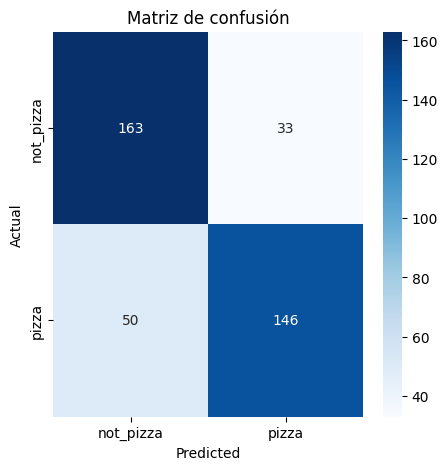

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener predicciones binarias
probs = model.predict(validation_data)
preds = (probs > 0.5).astype('int32').reshape(-1)

# Calcular matriz de confusión
y_true = validation_data.classes
cm = confusion_matrix(y_true, preds)

# Mostrar matriz
target_names = list(validation_data.class_indices.keys())
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de confusión')
plt.show()

## 7. Análisis de resultados

La red alcanzó una precisión de entrenamiento de aproximadamente 85.3% y una precisión de validación de alrededor de 81%. Esta diferencia del 4.3% sugiere un ligero sobreajuste, ya que el modelo aprende características específicas del conjunto de entrenamiento más rápidamente de lo que generaliza al conjunto de validación.

La pérdida de entrenamiento disminuyó de cerca de 1.31 en la primera época a 0.36 en la última, mientras que la pérdida de validación se estabilizó en torno a 0.51. Esto refuerza la idea de una mayor capacidad de ajuste frente a una capacidad de generalización más limitada.

La matriz de confusión [[163, 33], [50, 146]] revela que el modelo identificó correctamente 163 imágenes de pizza y 146 imágenes de no-pizza. Sin embargo, clasificó erróneamente 33 pizzas como no-pizza y 50 no-pizzas como pizza. El recall para la clase pizza (163/(163+33) ≃0.83) indica una buena capacidad de detección de pizzas, mientras que la precision (163/(163+50) ≃0.77) muestra cierta tendencia a falsos positivos. Para la clase no-pizza, la precision es alta (146/(146+33) ≃0.82) pero el recall es menor (146/(146+50) ≃0.75), lo que indica que algunas no-pizzas se clasifican incorrectamente.

Estos resultados sugieren que ajustar el umbral de decisión, aumentar el tamaño del dataset, o introducir técnicas de regularización y early stopping podría mejorar el equilibrio entre precision y recall.